MSE: 0.53, R^2: 0.89


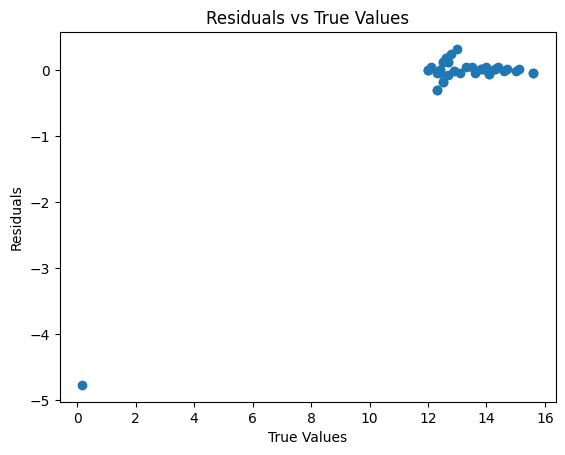

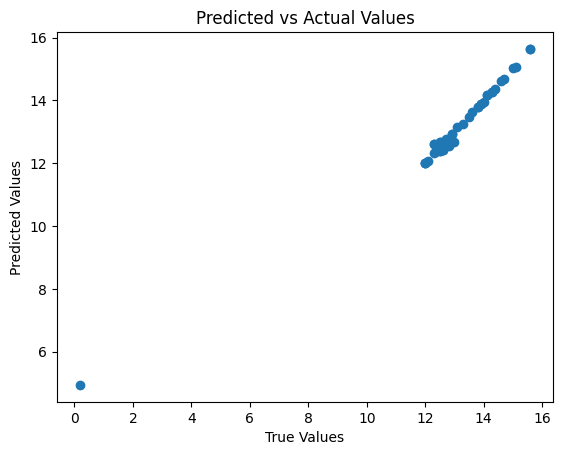

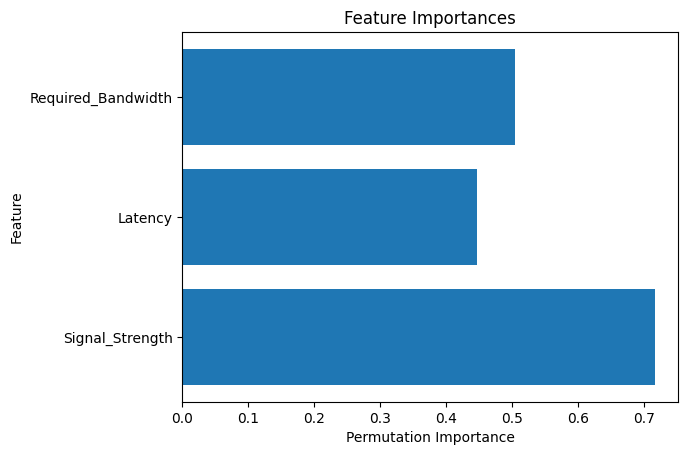

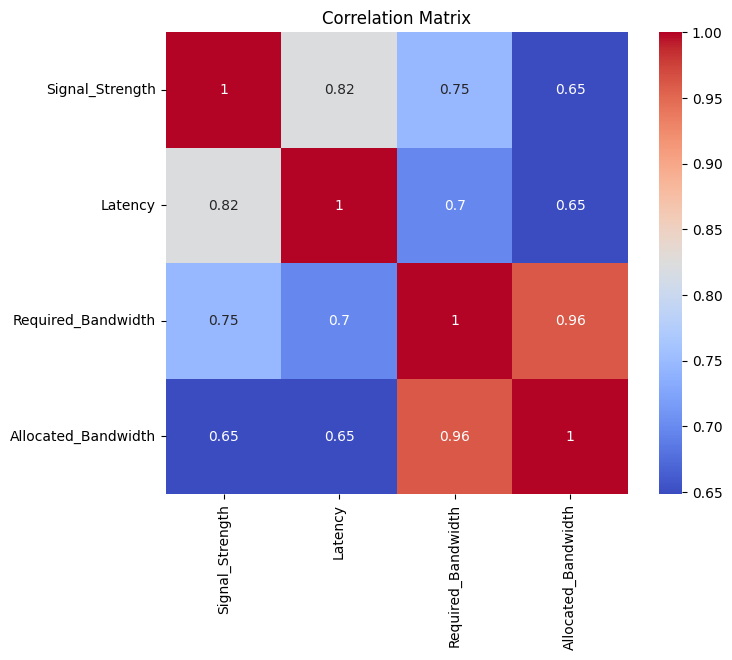

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# Load the dataset
data = pd.read_csv('D:\Rohan_PES\SEM 6\Capstone\Service 5G 1500 records.csv')

# Filter for Web_Browsing
web_browsing = data[data['Application_Type'] == 'Video_Call'].copy()

# Remove the unit from the 'Latency' column and convert the values to float
web_browsing.loc[:, 'Latency'] = web_browsing['Latency'].str.replace(' ms', '').astype(float)

# Remove the unit from the 'Signal_Strength' column and convert the values to float
web_browsing.loc[:, 'Signal_Strength'] = web_browsing['Signal_Strength'].str.replace(' dBm', '').astype(float)

# Remove the unit from the 'Required_Bandwidth' column and convert the values to float
web_browsing.loc[:, 'Required_Bandwidth'] = web_browsing['Required_Bandwidth'].apply(lambda x: float(x.replace(' Mbps', '')) if 'Mbps' in x else float(x.replace(' Kbps', '')) / 1000)

# Remove the unit from the 'Allocated_Bandwidth' column and convert the values to float
web_browsing.loc[:, 'Allocated_Bandwidth'] = web_browsing['Allocated_Bandwidth'].apply(lambda x: float(x.replace(' Mbps', '')) if 'Mbps' in x else float(x.replace(' Kbps', '')) / 1000)

# Prepare the data for KNN regression
X = web_browsing[['Signal_Strength', 'Latency', 'Required_Bandwidth']]
y = web_browsing['Allocated_Bandwidth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN regression model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, R^2: {r2:.2f}')

# Plot the residuals
plt.scatter(y_test, y_test - y_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals vs True Values')
plt.show()

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# Calculate permutation importance
importances = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Plot the feature importances
plt.barh(range(X.shape[1]), importances.importances_mean)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.yticks(range(X.shape[1]), X.columns)
plt.show()

# Plot the correlation matrix
corr_matrix = web_browsing[['Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

MSE: 0.00, R^2: 0.99


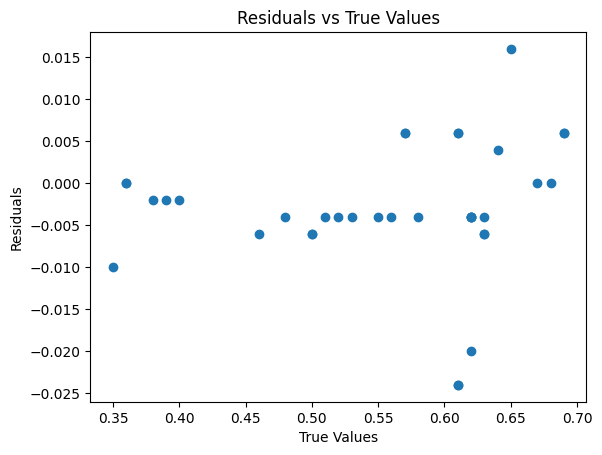

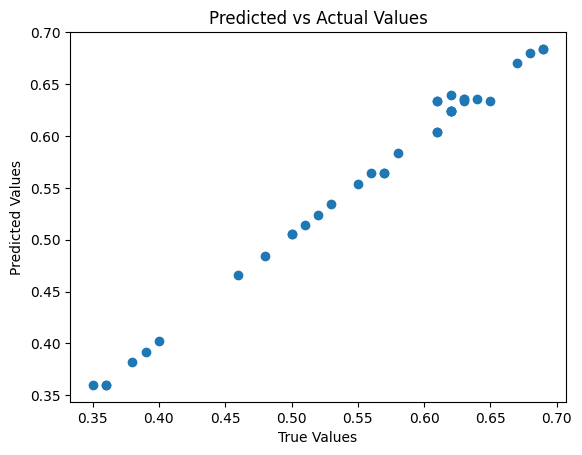

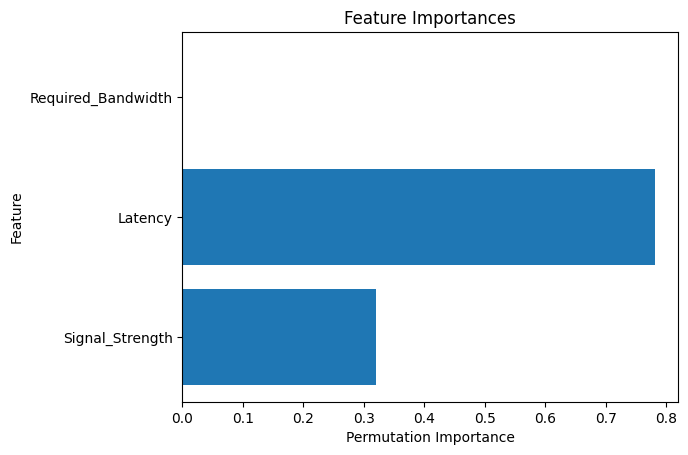

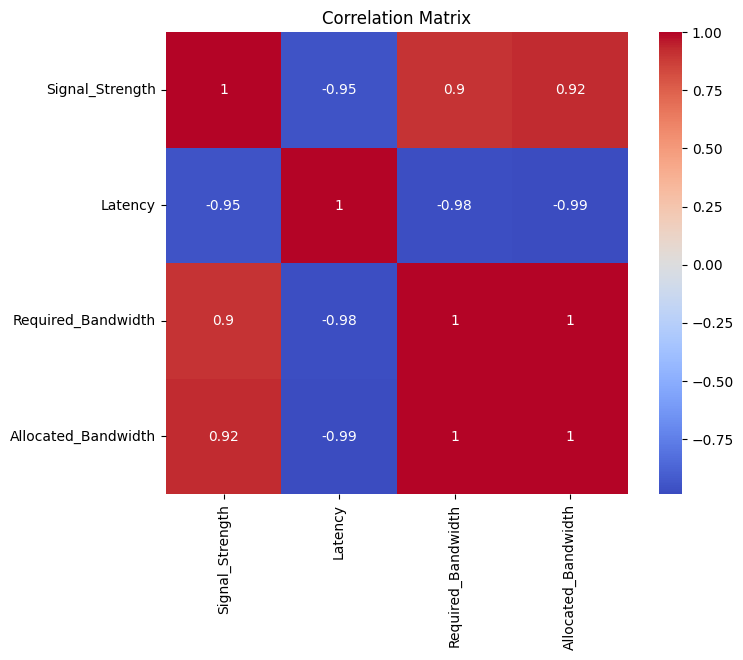

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

# Load the dataset
data = pd.read_csv('D:\Rohan_PES\SEM 6\Capstone\Service 5G 1500 records.csv')

# Filter for Web_Browsing
web_browsing = data[data['Application_Type'] == 'Background_Download'].copy()

# Remove the unit from the 'Latency' column and convert the values to float
web_browsing.loc[:, 'Latency'] = web_browsing['Latency'].str.replace(' ms', '').astype(float)

# Remove the unit from the 'Signal_Strength' column and convert the values to float
web_browsing.loc[:, 'Signal_Strength'] = web_browsing['Signal_Strength'].str.replace(' dBm', '').astype(float)

# Remove the unit from the 'Required_Bandwidth' column and convert the values to float
web_browsing.loc[:, 'Required_Bandwidth'] = web_browsing['Required_Bandwidth'].apply(lambda x: float(x.replace(' Mbps', '')) if 'Mbps' in x else float(x.replace(' Kbps', '')) / 1000)

# Remove the unit from the 'Allocated_Bandwidth' column and convert the values to float
web_browsing.loc[:, 'Allocated_Bandwidth'] = web_browsing['Allocated_Bandwidth'].apply(lambda x: float(x.replace(' Mbps', '')) if 'Mbps' in x else float(x.replace(' Kbps', '')) / 1000)

# Prepare the data for KNN regression
X = web_browsing[['Signal_Strength', 'Latency', 'Required_Bandwidth']]
y = web_browsing['Allocated_Bandwidth']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN regression model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, R^2: {r2:.2f}')

# Plot the residuals
plt.scatter(y_test, y_test - y_pred)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals vs True Values')
plt.show()

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# Calculate permutation importance
importances = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Plot the feature importances
plt.barh(range(X.shape[1]), importances.importances_mean)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.yticks(range(X.shape[1]), X.columns)
plt.show()

# Plot the correlation matrix
corr_matrix = web_browsing[['Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()